# **Data preprocessing**

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

filename = 'Obesity Data Set.csv'

# Load the CSV file
df = pd.read_csv(filename)

# Make a copy
df_original_copy = df.copy()

# Missing values

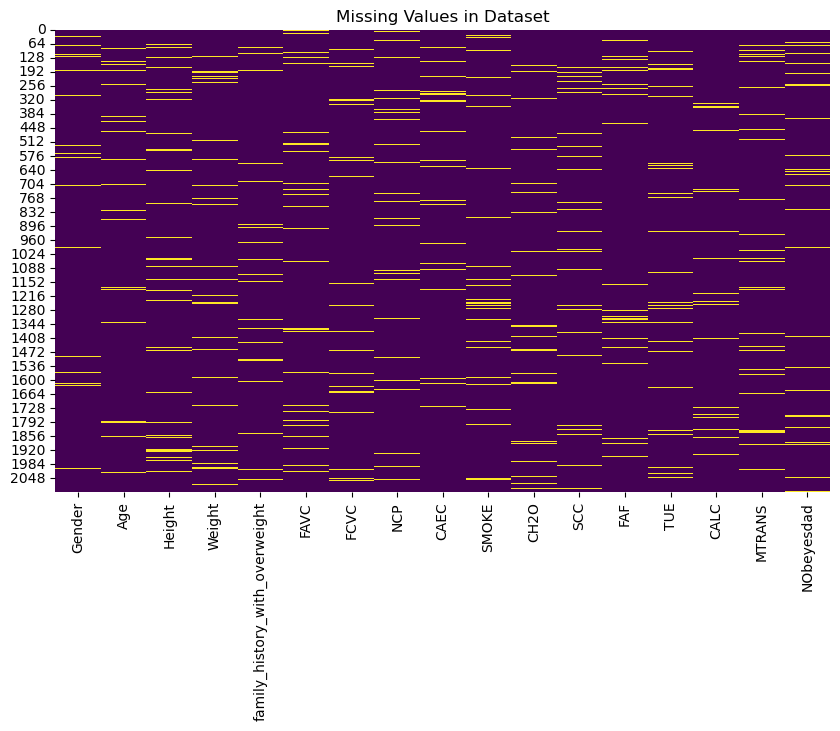

In [74]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values in Dataset")
plt.show()

# Gender distribution

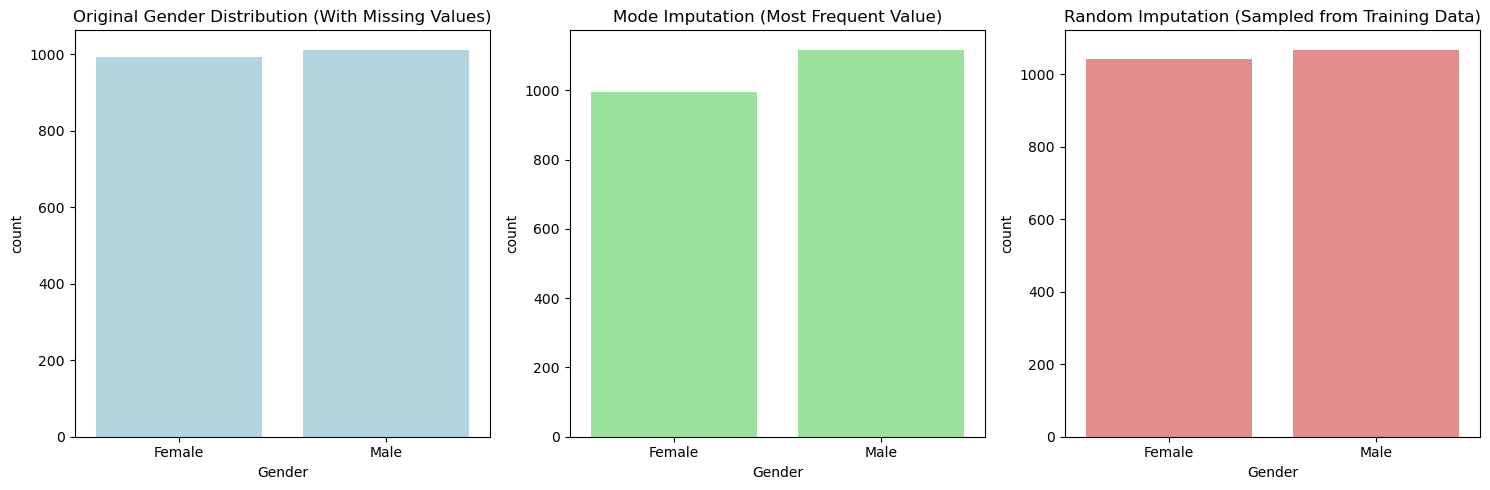

In [75]:
# Original Gender Countplot (with missing values)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=df['Gender'], color="lightblue")  
plt.title("Original Gender Distribution (With Missing Values)")

# Mode Imputation
mode_value = df['Gender'].mode()[0]
df_mode = df.copy()
df_mode['Gender'] = df_mode['Gender'].fillna(mode_value)

plt.subplot(1, 3, 2)
sns.countplot(x=df_mode['Gender'], color="lightgreen") 
plt.title("Mode Imputation (Most Frequent Value)")

# Random Imputation
non_null_values = df['Gender'].dropna().unique()
df_random = df.copy()
df_random['Gender'] = df_random['Gender'].apply(
    lambda x: np.random.choice(non_null_values) if pd.isna(x) else x
)

plt.subplot(1, 3, 3)
sns.countplot(x=df_random['Gender'], color="lightcoral")  
plt.title("Random Imputation (Sampled from Training Data)")

# Show the plots
plt.tight_layout()
plt.show()


Since the random imputation is similar to our original data, we will randomly impute values.

In [76]:
def random_impute_categorical(df, column):
    non_null_values = df[column].dropna().values  # Get the non-null values in the column
    df[column] = df[column].apply(lambda x: np.random.choice(non_null_values) if pd.isna(x) else x)
    return df

In [77]:
df = random_impute_categorical(df, 'Gender')

# Age

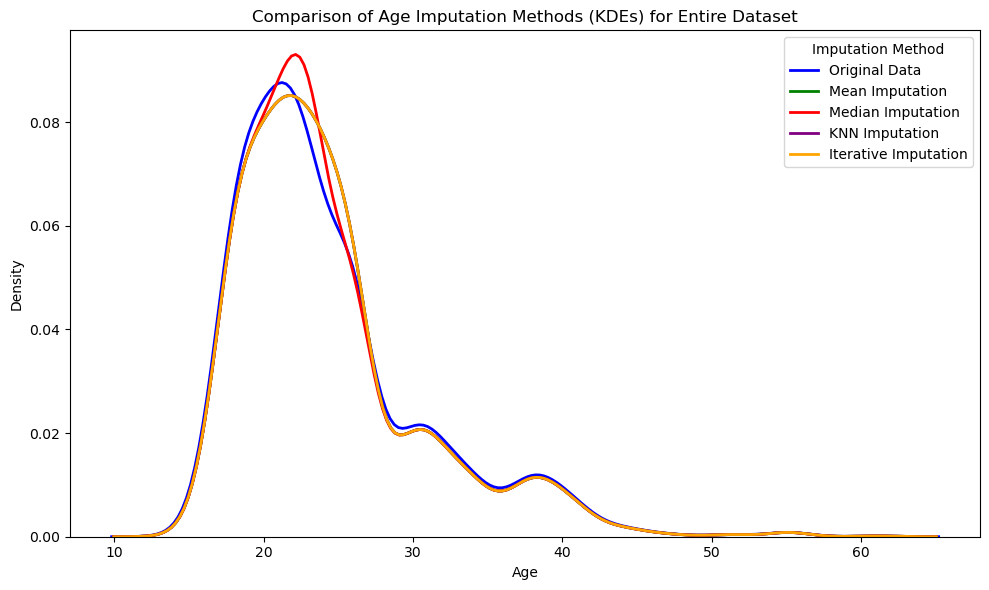

In [78]:
df_mean = df.copy()
df_median = df.copy()
df_knn = df.copy()
df_iterative = df.copy()

# Mean imputation
df_mean['Age'] = df_mean['Age'].fillna(df_mean['Age'].mean())

# Median imputation
df_median['Age'] = df_median['Age'].fillna(df_median['Age'].median())

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn['Age'] = knn_imputer.fit_transform(df_knn[['Age']])

# Iterative Imputation
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)
df_iterative['Age'] = iterative_imputer.fit_transform(df_iterative[['Age']])

# Plot KDEs for all imputation methods
plt.figure(figsize=(10, 6))

# KDE for original data
sns.kdeplot(df['Age'].dropna(), color='blue', label='Original Data', lw=2)

# KDE for mean imputation
sns.kdeplot(df_mean['Age'], color='green', label='Mean Imputation', lw=2)

# KDE for median imputation
sns.kdeplot(df_median['Age'], color='red', label='Median Imputation', lw=2)

# KDE for KNN Imputation
sns.kdeplot(df_knn['Age'], color='purple', label='KNN Imputation', lw=2)

# KDE for Iterative Imputation
sns.kdeplot(df_iterative['Age'], color='orange', label='Iterative Imputation', lw=2)

# Add labels and legend
plt.title('Comparison of Age Imputation Methods (KDEs) for Entire Dataset')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Imputation Method')

# Show the plot
plt.tight_layout()
plt.show()


We will use KNN imputation.

In [79]:
# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation directly to the Age column
df['Age'] = knn_imputer.fit_transform(df[['Age']])

# Height

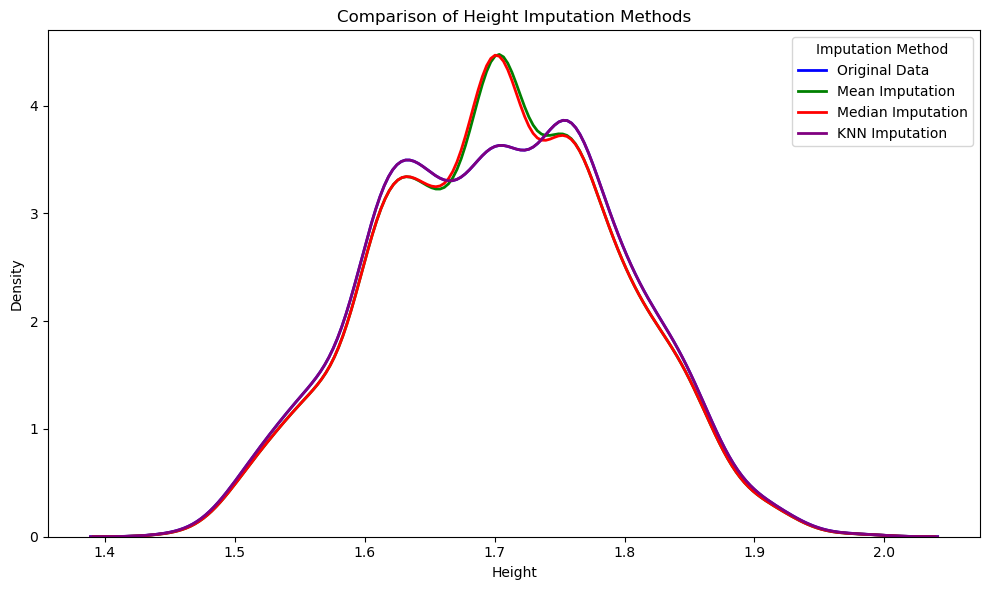

In [80]:
# Create copies of the original dataframe
df_train_mean = df.copy()
df_train_median = df.copy()
df_train_random = df.copy()

# Mean imputation for Height
df_train_mean['Height'] = df_train_mean['Height'].fillna(df_train_mean['Height'].mean())

# Median imputation for Height
df_train_median['Height'] = df_train_median['Height'].fillna(df_train_median['Height'].median())

# Random imputation for Height
non_null_values = df['Height'].dropna().values  # Get the non-null values for random selection
df_train_random['Height'] = df_train_random['Height'].apply(
    lambda x: np.random.choice(non_null_values) if pd.isna(x) else x
)

# Plot KDEs for all 3 imputation methods on the same plot
plt.figure(figsize=(10, 6))

# KDE for original data (excluding NaNs)
sns.kdeplot(df['Height'].dropna(), color='blue', label='Original Data', lw=2)

# KDE for mean imputation
sns.kdeplot(df_train_mean['Height'], color='green', label='Mean Imputation', lw=2)

# KDE for median imputation
sns.kdeplot(df_train_median['Height'], color='red', label='Median Imputation', lw=2)

# KDE for KNN Imputation
sns.kdeplot(df_knn['Height'], color='purple', label='KNN Imputation', lw=2)

# Add labels and legend
plt.title('Comparison of Height Imputation Methods')
plt.xlabel('Height')
plt.ylabel('Density')
plt.legend(title='Imputation Method')


plt.tight_layout()
plt.show()

We will move forward with the KNN imputation.

In [81]:
# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation directly to the Age column
df['Height'] = knn_imputer.fit_transform(df[['Height']])

# Weight

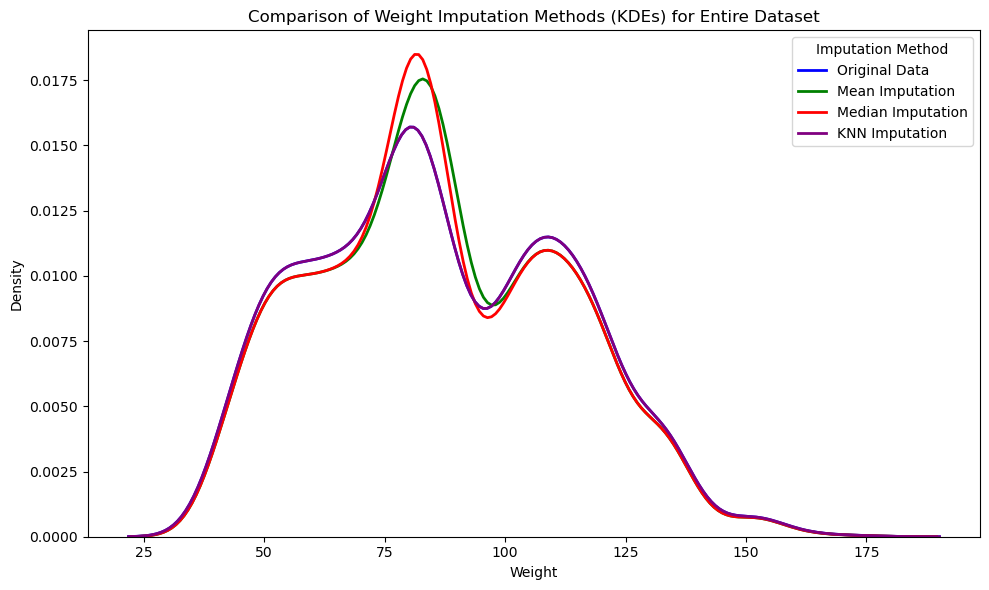

In [82]:
# Create copies for mean, median, and random imputation
df_mean = df.copy()
df_median = df.copy()

# Mean imputation
df_mean['Weight'] = df_mean['Weight'].fillna(df_mean['Weight'].mean())

# Median imputation
df_median['Weight'] = df_median['Weight'].fillna(df_median['Weight'].median())

# Plot KDEs for all 3 imputation methods on the same plot
plt.figure(figsize=(10, 6))

# KDE for original data
sns.kdeplot(df['Weight'].dropna(), color='blue', label='Original Data', lw=2)

# KDE for mean imputation
sns.kdeplot(df_mean['Weight'], color='green', label='Mean Imputation', lw=2)

# KDE for median imputation
sns.kdeplot(df_median['Weight'], color='red', label='Median Imputation', lw=2)

# KDE for KNN Imputation
sns.kdeplot(df_knn['Weight'], color='purple', label='KNN Imputation', lw=2)

# Add labels and legend
plt.title('Comparison of Weight Imputation Methods (KDEs) for Entire Dataset')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.legend(title='Imputation Method')

# Show the plot
plt.tight_layout()
plt.show()

We choose the KNN imputation.

In [83]:
# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation directly to the Age column
df['Weight'] = knn_imputer.fit_transform(df[['Weight']])

# Family History with Overweight

---



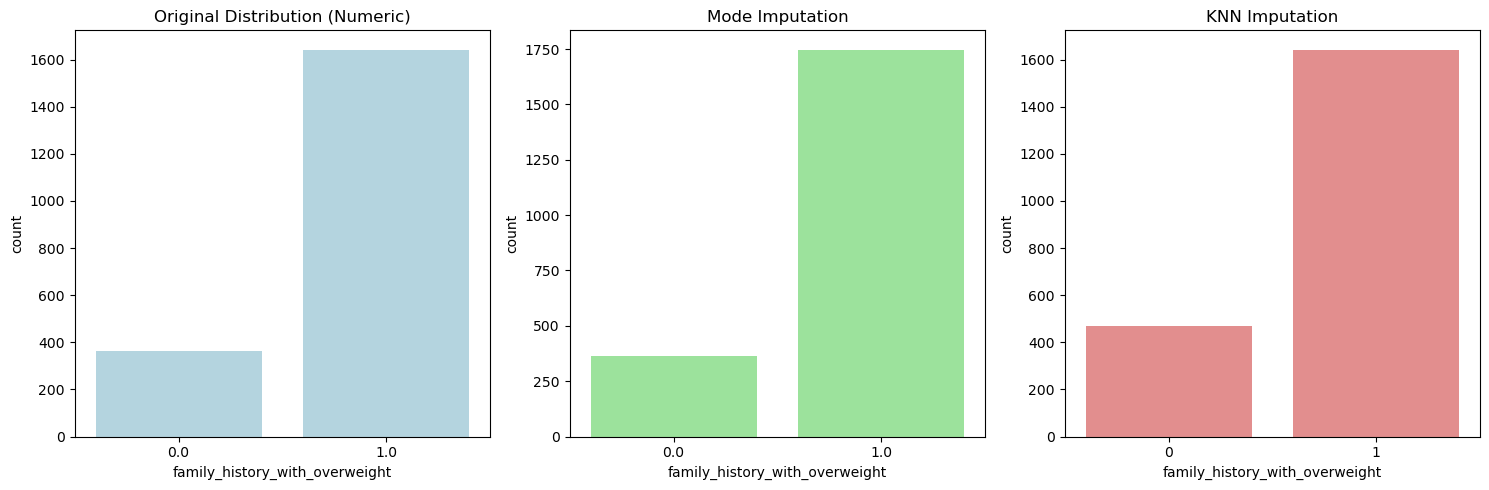

In [84]:
plt.figure(figsize=(15, 5))

# Convert 'yes'/'no' to 1/0 before imputation (for all dataframes)
df_numeric = df.copy()
df_numeric['family_history_with_overweight'] = df_numeric['family_history_with_overweight'].map({'yes': 1, 'no': 0})

# Original Distribution (already numeric)
plt.subplot(1, 3, 1)
sns.countplot(x=df_numeric['family_history_with_overweight'], color="lightblue")
plt.title("Original Distribution (Numeric)")

# Mode Imputation (on numeric data)
df_mode = df_numeric.copy()
mode_value = df_mode['family_history_with_overweight'].mode()[0]
df_mode['family_history_with_overweight'] = df_mode['family_history_with_overweight'].fillna(mode_value)

plt.subplot(1, 3, 2)
sns.countplot(x=df_mode['family_history_with_overweight'], color="lightgreen")
plt.title("Mode Imputation")

# KNN Imputation (on numeric data)
df_knn = df_numeric.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[['family_history_with_overweight']] = knn_imputer.fit_transform(df_knn[['family_history_with_overweight']])

plt.subplot(1, 3, 3)
sns.countplot(x=df_knn['family_history_with_overweight'].astype(int), color="lightcoral")  # Ensure integer for countplot
plt.title("KNN Imputation")

# Show the plots
plt.tight_layout()
plt.show()

In that case, mode imputation is better.

In [85]:
df['family_history_with_overweight']=df['family_history_with_overweight'].fillna(df['family_history_with_overweight'].mode()[0])

# Frequent Consumption of High Caloric Food (FAVC)

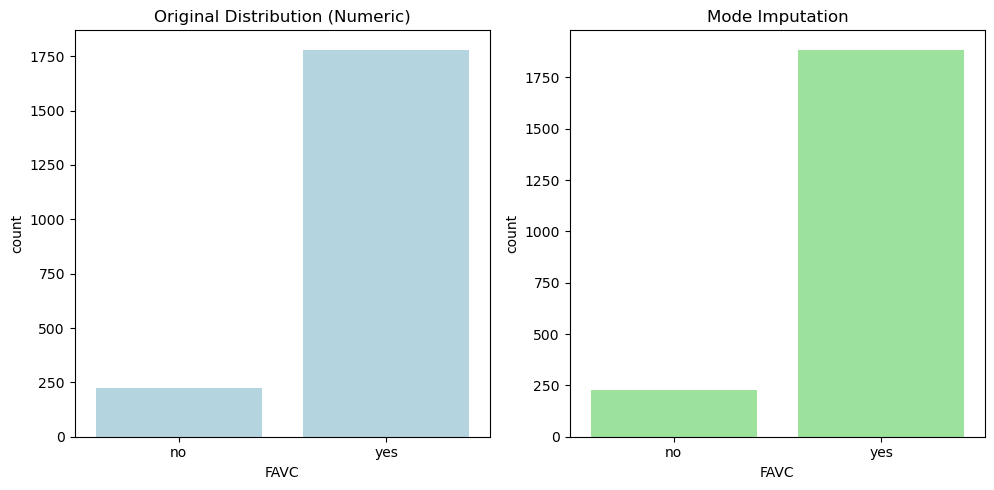

In [86]:
plt.figure(figsize=(15, 5))

df_numeric = df.copy()

# Original Distribution (already numeric)
plt.subplot(1, 3, 1)
sns.countplot(x=df_numeric['FAVC'], color="lightblue")
plt.title("Original Distribution (Numeric)")

# Mode Imputation (on numeric data)
df_mode = df_numeric.copy()
mode_value = df_mode['FAVC'].mode()[0]
df_mode['FAVC'] = df_mode['FAVC'].fillna(mode_value)

plt.subplot(1, 3, 2)
sns.countplot(x=df_mode['FAVC'], color="lightgreen")
plt.title("Mode Imputation")

# Show the plots
plt.tight_layout()
plt.show()

Mode imputation conserves our distribution.

In [87]:
df['FAVC']=df['FAVC'].fillna(df['FAVC'].mode()[0])

# Frequent Consumption of Vegetables (FCVC)

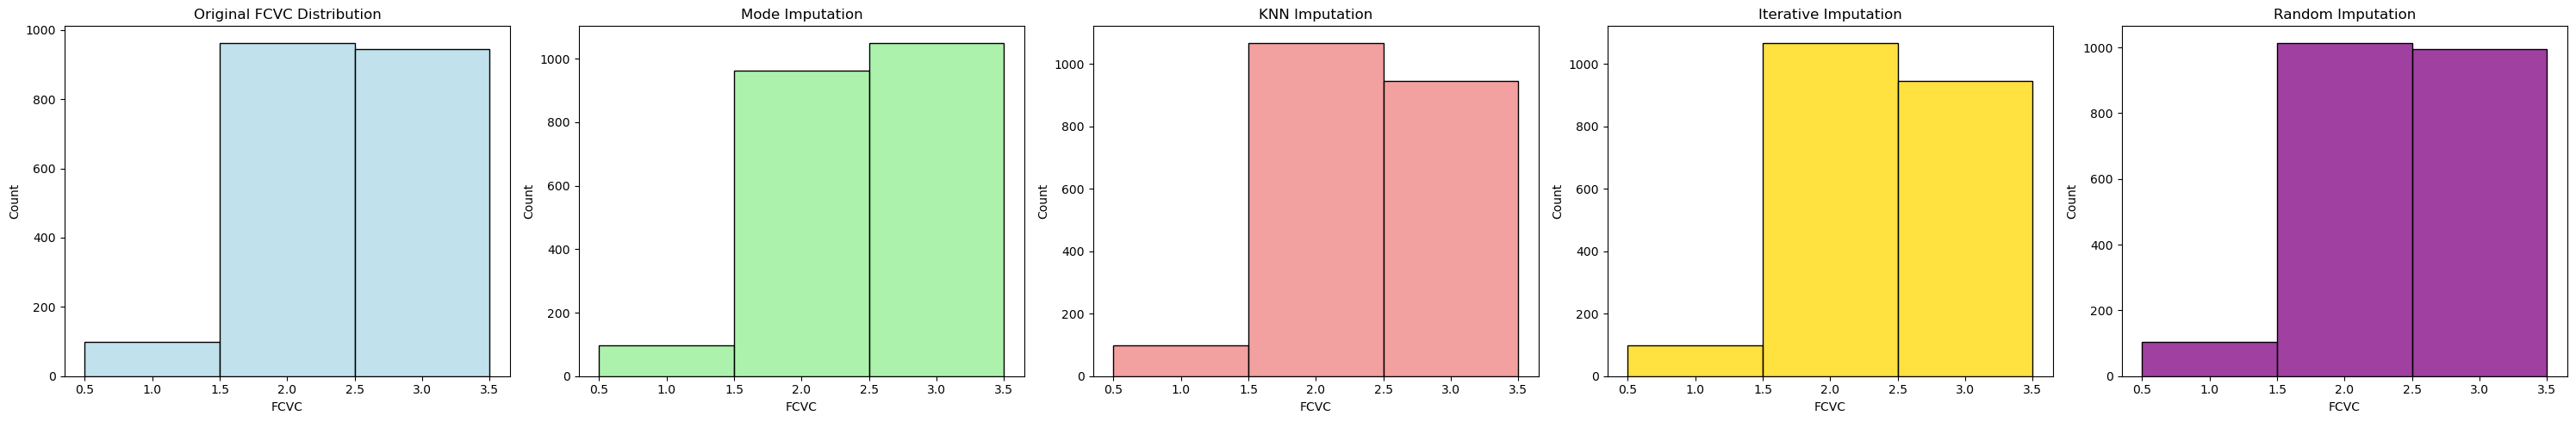

In [88]:
plt.figure(figsize=(30, 5))

df_numeric = df.copy()

# Original FCVC Distribution (Histogram)
plt.subplot(1, 5, 1)
sns.histplot(df_numeric['FCVC'], kde=False, color="lightblue", discrete=True, bins=3, legend=False)
plt.title("Original FCVC Distribution")

# Mode Imputation
df_mode = df_numeric.copy()
mode_value = df_mode['FCVC'].mode()[0]
df_mode['FCVC'] = df_mode['FCVC'].fillna(mode_value)

plt.subplot(1, 5, 2)
sns.histplot(df_mode['FCVC'], kde=False, color="lightgreen", discrete=True, bins=3, legend=False)
plt.title("Mode Imputation")

# KNN Imputation
df_knn = df_numeric.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[['FCVC']] = knn_imputer.fit_transform(df_knn[['FCVC']])

plt.subplot(1, 5, 3)
sns.histplot(df_knn['FCVC'], kde=False, color="lightcoral", discrete=True, bins=3, legend=False)
plt.title("KNN Imputation")

# Iterative Imputation
df_iter = df_numeric.copy()
iter_imputer = IterativeImputer(max_iter=10, random_state=42)
df_iter[['FCVC']] = iter_imputer.fit_transform(df_iter[['FCVC']])

plt.subplot(1, 5, 4)
sns.histplot(df_iter['FCVC'], kde=False, color="gold", discrete=True, bins=3, legend=False)
plt.title("Iterative Imputation")

# Random Imputation
df_random = df_numeric.copy()
non_null_values = df_random['FCVC'].dropna().values  # Get non-null values
df_random['FCVC'] = df_random['FCVC'].apply(
    lambda x: np.random.choice(non_null_values) if pd.isna(x) else x
)

plt.subplot(1, 5, 5)
sns.histplot(df_random['FCVC'], kde=False, color="purple", discrete=True, bins=3, legend=False)
plt.title("Random Imputation")

# Show the plots
plt.tight_layout()
plt.show()

Random imputation is the technique that best preserves our data.

In [89]:
non_null_values = df['FCVC'].dropna().values  # Get non-null values from the column
df['FCVC'] = df['FCVC'].apply(
    lambda x: np.random.choice(non_null_values) if pd.isna(x) else x  # Replace NaN with random choice
)

# Number of Meals per Day (NCP)

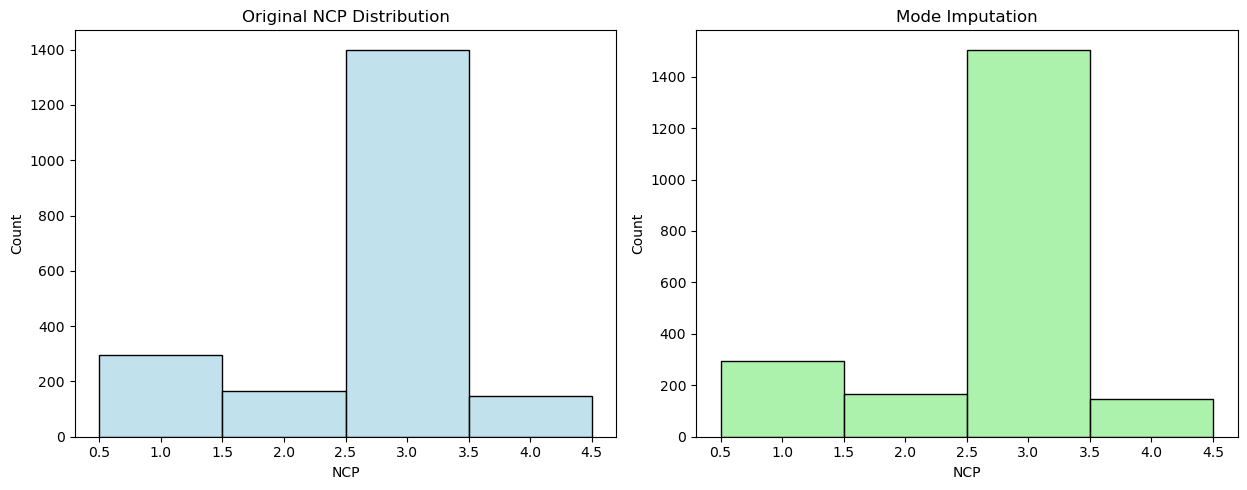

In [90]:
plt.figure(figsize=(25, 5))

# Original NCP Distribution (Histogram)
plt.subplot(1, 4, 1)
sns.histplot(df['NCP'], kde=False, color="lightblue", discrete=True)
plt.title("Original NCP Distribution")

# Mode Imputation
df_mode = df.copy()  
mode_value = df_mode['NCP'].mode()[0]
df_mode['NCP'] = df_mode['NCP'].fillna(mode_value)

plt.subplot(1, 4, 2)
sns.histplot(df_mode['NCP'], kde=False, color="lightgreen", discrete=True)
plt.title("Mode Imputation")

# Show the plots
plt.tight_layout()
plt.show()

Since 3 meals per day is the norm for most people, hence it is the mode, we will move forward with the mode imputation.

In [91]:
df['NCP'] = df['NCP'].fillna(df['NCP'].median())

# Frequency of in-between meals snacking (CAEC)

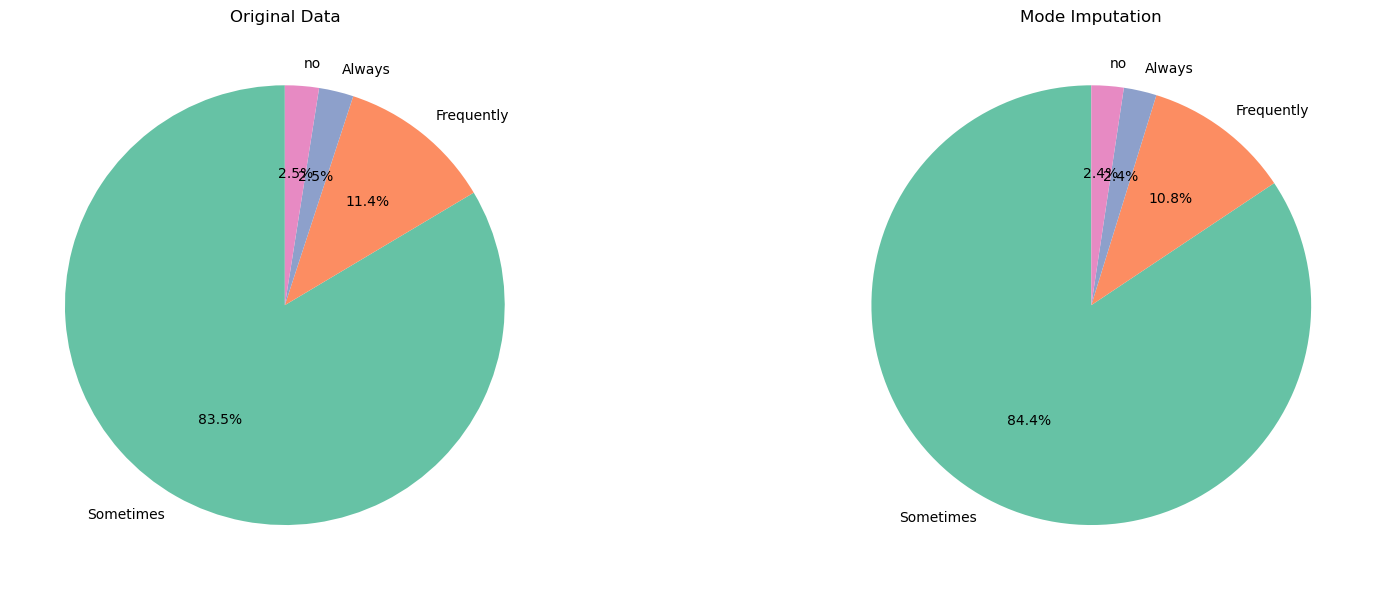

In [92]:
# Make sure to create copies for each imputation method
df_mode = df.copy()
mode_value = df_mode['CAEC'].mode()[0]
df_mode['CAEC'] = df_mode['CAEC'].fillna(mode_value)

# Create the subplots for the pie charts
plt.figure(figsize=(18, 6))

# Original Data - Pie Chart
plt.subplot(1, 2, 1)
original_counts = df['CAEC'].value_counts(normalize=True) * 100
plt.pie(original_counts, labels=original_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", 4))
plt.title("Original Data")

# Mode Imputation - Pie Chart
plt.subplot(1, 2, 2)
mode_counts = df_mode['CAEC'].value_counts(normalize=True) * 100
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", 4))
plt.title("Mode Imputation")


# Display the pie charts
plt.tight_layout()
plt.show()

The change is <1%, hence we will move forward with the mode imputation.

In [93]:
df['CAEC'] = df['CAEC'].fillna(df['CAEC'].mode()[0])

# Smoking habits

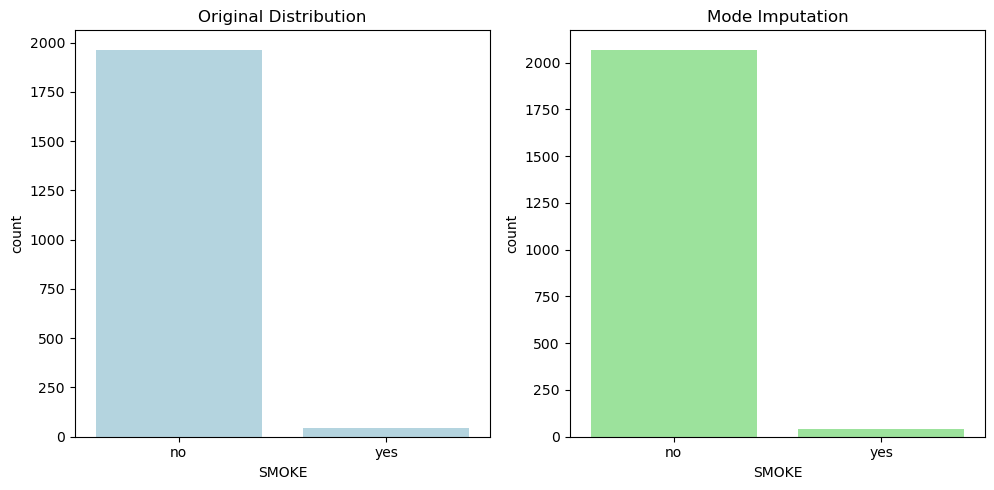

Original Data:
   Yes: 2.0937188434695915 %
   No: 97.90628115653041 %

Mode Imputation:
   Yes: 1.989578398863098 %
   No: 98.0104216011369 %



In [94]:
plt.figure(figsize=(15, 5))

# Original Gender Distribution
plt.subplot(1, 3, 1)
sns.countplot(x=df['SMOKE'], color="lightblue")
plt.title("Original Distribution")

# Mode Imputation
df_mode = df.copy() 
mode_value = df_mode['SMOKE'].mode()[0]
df_mode['SMOKE'] = df_mode['SMOKE'].fillna(mode_value)

plt.subplot(1, 3, 2)
sns.countplot(x=df_mode['SMOKE'], color="lightgreen")
plt.title("Mode Imputation")

# Show the plots
plt.tight_layout()
plt.show()

original_counts = df['SMOKE'].value_counts(normalize=True) * 100
mode_counts = df_mode['SMOKE'].value_counts(normalize=True) * 100

print("Original Data:")
print("   Yes:", original_counts['yes'], "%")
print("   No:", original_counts['no'], "%")
print()

print("Mode Imputation:")
print("   Yes:", mode_counts['yes'], "%")
print("   No:", mode_counts['no'], "%")
print()

Since the difference is meaningless, we will move forward with the mode imputation.

In [95]:
df['SMOKE'] = df['SMOKE'].fillna(df['SMOKE'].mode()[0])

# Daily Water Consumption

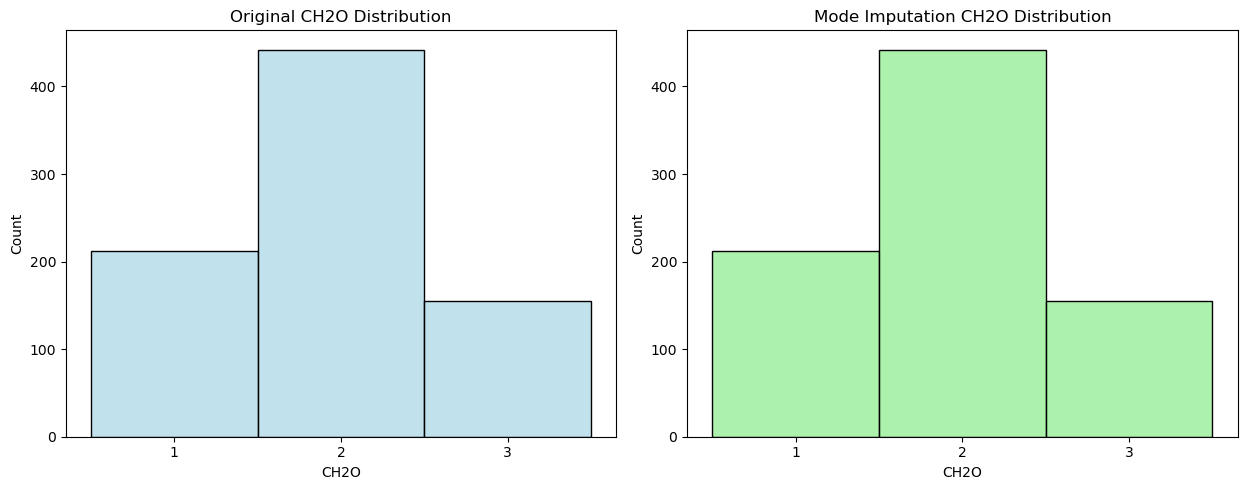

Original Data Percentages:
Value 1 : 26.21 %
Value 2 : 54.64 %
Value 3 : 19.16 %

Mode Imputation Percentages:
Value 1 : 26.21 %
Value 2 : 54.64 %
Value 3 : 19.16 %

Percentage Changes between Original and Mode Imputed Data:
Value 1 : Change = 0.0 %
Value 2 : Change = 0.0 %
Value 3 : Change = 0.0 %

Chi-Square Test:
Chi-Square Statistic: 0.0
P-Value: 1.0
The change is not statistically significant.


In [96]:
df_filtered = df[df['CH2O'].isin([1, 2, 3])]
df_mode_filtered = df_mode[df_mode['CH2O'].isin([1, 2, 3])]

# Calculate percentages for Original Data
original_percentages = df_filtered['CH2O'].value_counts(normalize=True) * 100

# Calculate percentages for Mode Imputed Data
mode_percentages = df_mode_filtered['CH2O'].value_counts(normalize=True) * 100

plt.figure(figsize=(25, 5))

# Original CH2O Distribution 
plt.subplot(1, 4, 1)
sns.histplot(df_filtered['CH2O'], kde=False, color="lightblue", discrete=True, bins=3, binwidth=1)
plt.title("Original CH2O Distribution")
plt.xticks([1, 2, 3])

# Mode Imputation 
plt.subplot(1, 4, 2)
sns.histplot(df_mode_filtered['CH2O'], kde=False, color="lightgreen", discrete=True, bins=3, binwidth=1)
plt.title("Mode Imputation CH2O Distribution")
plt.xticks([1, 2, 3])

# Show the plots
plt.tight_layout()
plt.show()

# Print the calculated percentages for Original and Mode Imputed Data
print("Original Data Percentages:")
for value in [1, 2, 3]:
    print("Value", value, ":", round(original_percentages.get(value, 0), 2), "%")

print("\nMode Imputation Percentages:")
for value in [1, 2, 3]:
    print("Value", value, ":", round(mode_percentages.get(value, 0), 2), "%")

# Calculate and print the percentage change between the original and mode imputed data
print("\nPercentage Changes between Original and Mode Imputed Data:")
for value in [1, 2, 3]:
    original_pct = original_percentages.get(value, 0)
    mode_pct = mode_percentages.get(value, 0)
    change = mode_pct - original_pct
    print("Value", value, ": Change =", round(change, 2), "%")

# Chi-Square Test for Goodness of Fit
# Creating contingency tables for original and mode imputed data
original_counts = df_filtered['CH2O'].value_counts().sort_index()
mode_counts = df_mode_filtered['CH2O'].value_counts().sort_index()

# Prepare the observed counts (mode-imputed counts) and expected counts (original counts)
observed = [mode_counts.get(1, 0), mode_counts.get(2, 0), mode_counts.get(3, 0)]
expected = [original_counts.get(1, 0), original_counts.get(2, 0), original_counts.get(3, 0)]

# Chi-Square Test
chi2, p_value = chi2_contingency([observed, expected])[:2]

# Output the result of the Chi-Square test
print("\nChi-Square Test:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("The change is statistically significant.")
else:
    print("The change is not statistically significant.")

Hence we will move forward with the mode imputation.

In [97]:
df['CH2O'] = df['CH2O'].fillna(df['CH2O'].mode()[0])

# Calorie Tracking (SCC)

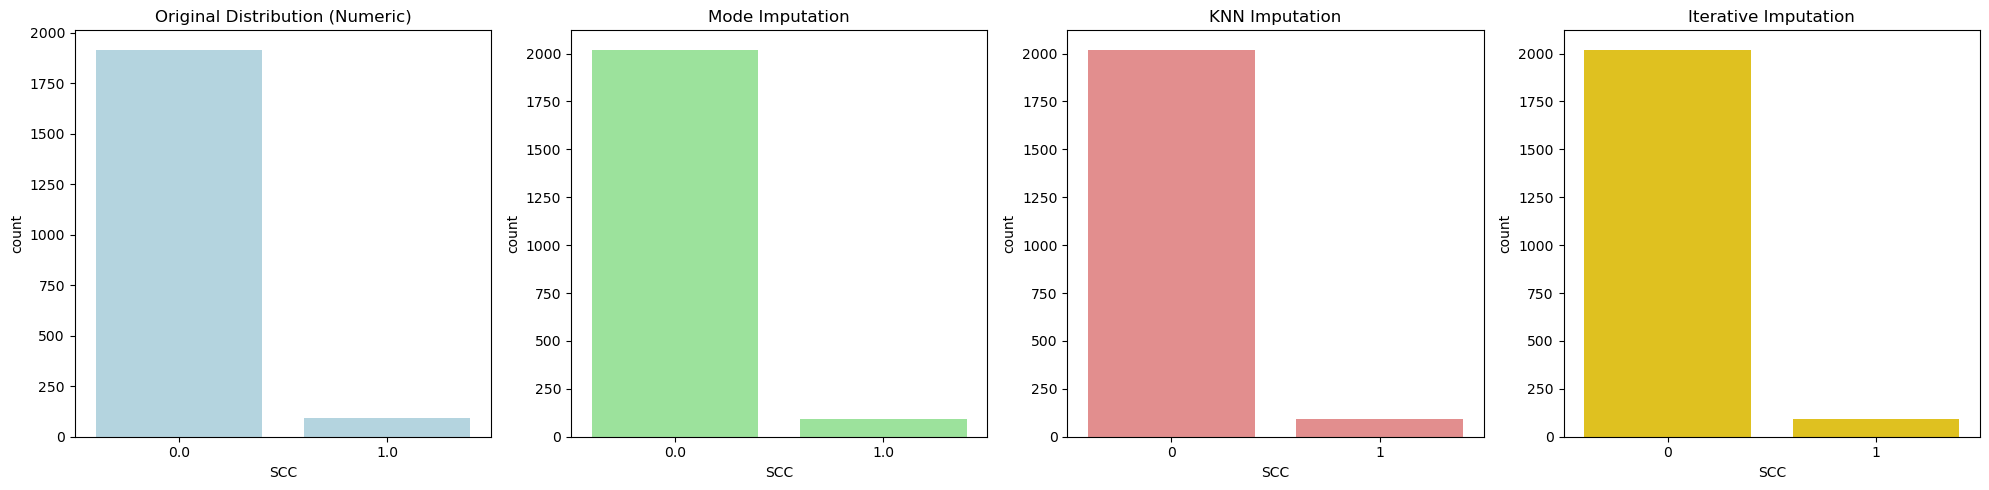

Original Data:
   Yes: 4.536390827517447 %
   No: 95.46360917248255 %

Mode Imputation:
   Yes: 4.310753197536712 %
   No: 95.68924680246329 %

KNN Imputation:
   Yes: 4.310753197536712 %
   No: 90.71530080530555 %

Iterative Imputation:
   Yes: 4.310753197536712 %
   No: 90.71530080530555 %


In [98]:
plt.figure(figsize=(20, 5))

# Convert 'yes'/'no' to 1/0 before imputation (for all dataframes)
df_numeric = df.copy()
df_numeric['SCC'] = df_numeric['SCC'].map({'yes': 1, 'no': 0})

# Original Distribution (already numeric)
plt.subplot(1, 4, 1)
sns.countplot(x=df_numeric['SCC'], color="lightblue")
plt.title("Original Distribution (Numeric)")

# Mode Imputation (on numeric data)
df_mode = df_numeric.copy()
mode_value = df_mode['SCC'].mode()[0]
df_mode['SCC'] = df_mode['SCC'].fillna(mode_value)

plt.subplot(1, 4, 2)
sns.countplot(x=df_mode['SCC'], color="lightgreen")
plt.title("Mode Imputation")

# KNN Imputation (on numeric data)
df_knn = df_numeric.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[['SCC']] = knn_imputer.fit_transform(df_knn[['SCC']])

plt.subplot(1, 4, 3)
sns.countplot(x=df_knn['SCC'].astype(int), color="lightcoral")  # Ensure integer for countplot
plt.title("KNN Imputation")

# Iterative Imputation
df_iter = df_numeric.copy()
iter_imputer = IterativeImputer(max_iter=10, random_state=0)
df_iter[['SCC']] = iter_imputer.fit_transform(df_iter[['SCC']])

plt.subplot(1, 4, 4)
sns.countplot(x=df_iter['SCC'].astype(int), color="gold")  # Ensure integer for countplot
plt.title("Iterative Imputation")

# Show the plots
plt.tight_layout()
plt.show()

# Get percentage distributions
original_counts = df_numeric['SCC'].value_counts(normalize=True) * 100
mode_counts = df_mode['SCC'].value_counts(normalize=True) * 100
knn_counts = df_knn['SCC'].value_counts(normalize=True) * 100
iter_counts = df_iter['SCC'].value_counts(normalize=True) * 100

# Print results
print("Original Data:")
print("   Yes:", original_counts[1], "%")
print("   No:", original_counts[0], "%")
print()

print("Mode Imputation:")
print("   Yes:", mode_counts[1], "%")
print("   No:", mode_counts[0], "%")
print()

print("KNN Imputation:")
print("   Yes:", knn_counts[1], "%")
print("   No:", knn_counts[0], "%")
print()

print("Iterative Imputation:")
print("   Yes:", iter_counts[1], "%")
print("   No:", iter_counts[0], "%")

In this case, mode imputation conserves our distribution the best.

In [99]:
df['SCC']=df['SCC'].fillna(df['SCC'].mode()[0])

# Physical Activity (FAF)

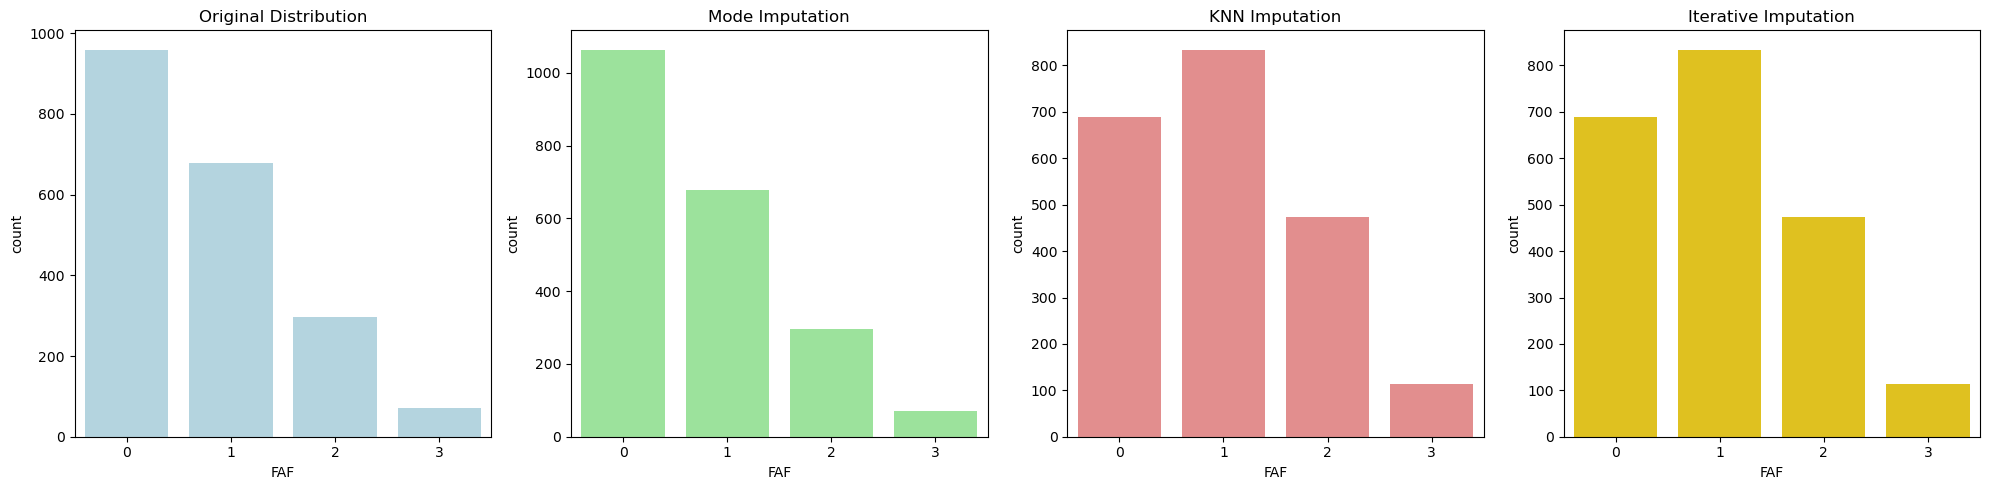

In [100]:
# Convert FAF to numeric, forcing NaNs to stay
df['FAF'] = pd.to_numeric(df['FAF'], errors='coerce')

# Set up figure
plt.figure(figsize=(20, 5))

# Original Distribution (Drop NaNs)
plt.subplot(1, 4, 1)
sns.countplot(x=df['FAF'].dropna().astype(int), order=[0, 1, 2, 3], color="lightblue")
plt.title("Original Distribution")

# Mode Imputation
df_mode = df.copy()
mode_value = df_mode['FAF'].mode()[0]
df_mode['FAF'] = df_mode['FAF'].fillna(mode_value)

# Drop extra columns if any were added during imputation (like FAFmode)
df_mode = df_mode.loc[:, ['FAF']]

plt.subplot(1, 4, 2)
sns.countplot(x=df_mode['FAF'].astype(int), order=[0, 1, 2, 3], color="lightgreen")
plt.title("Mode Imputation")

# KNN Imputation
df_knn = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn['FAF'] = knn_imputer.fit_transform(df_knn[['FAF']])  # Only modify the 'FAF' column

# Drop extra columns if any were added during imputation (like FAFknn)
df_knn = df_knn.loc[:, ['FAF']]

plt.subplot(1, 4, 3)
sns.countplot(x=df_knn['FAF'].round().astype(int), order=[0, 1, 2, 3], color="lightcoral")
plt.title("KNN Imputation")

# Iterative Imputation
df_iter = df.copy()
iter_imputer = IterativeImputer(max_iter=10, random_state=0)
df_iter['FAF'] = iter_imputer.fit_transform(df_iter[['FAF']])  # Only modify the 'FAF' column

# Drop extra columns if any were added during imputation (like FAFiterative)
df_iter = df_iter.loc[:, ['FAF']]

plt.subplot(1, 4, 4)
sns.countplot(x=df_iter['FAF'].round().astype(int), order=[0, 1, 2, 3], color="gold")
plt.title("Iterative Imputation")

# Show the plots
plt.tight_layout()
plt.show()

We choose the mode imputation.

In [101]:
df['FAF'] = df['FAF'].fillna(df['FAF'].mode()[0])

# Time Using Technological Devices

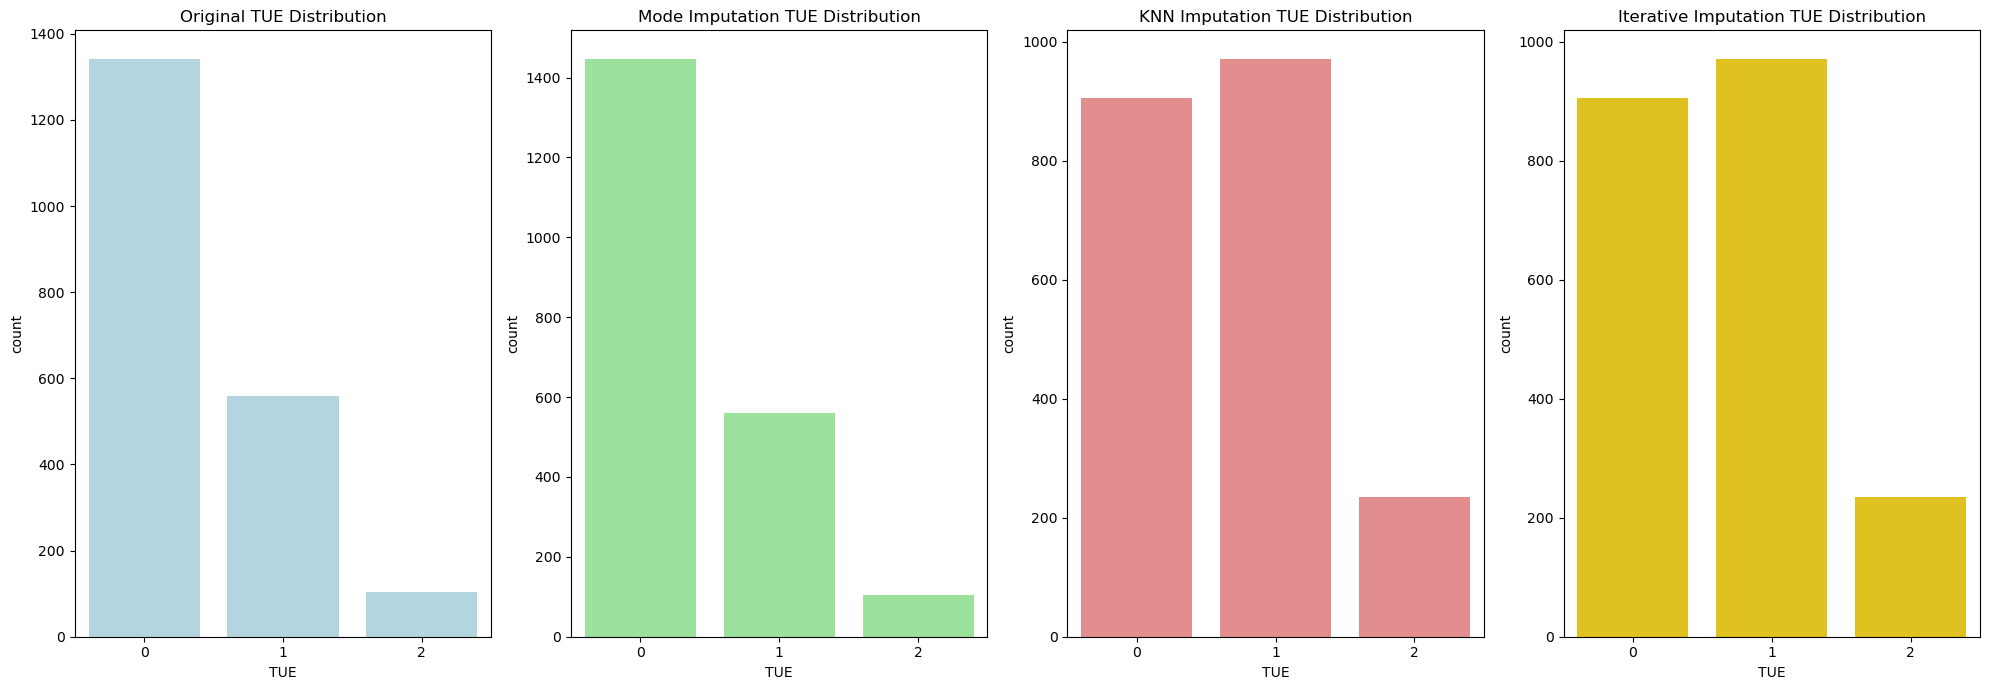

In [102]:
# Convert TUE to numeric, forcing NaNs to stay
df['TUE'] = pd.to_numeric(df['TUE'], errors='coerce')

# Set up figure
plt.figure(figsize=(20, 7))

# Original Distribution (Drop NaNs)
plt.subplot(1, 4, 1)
sns.countplot(x=df['TUE'].dropna().astype(int), order=[0, 1, 2], color="lightblue")
plt.title("Original TUE Distribution")
plt.xticks([0, 1, 2])

# Mode Imputation
df_mode = df.copy()
mode_value = df_mode['TUE'].mode()[0]
df_mode['TUE'] = df_mode['TUE'].fillna(mode_value)

plt.subplot(1, 4, 2)
sns.countplot(x=df_mode['TUE'].astype(int), order=[0, 1, 2], color="lightgreen")
plt.title("Mode Imputation TUE Distribution")
plt.xticks([0, 1, 2])

# KNN Imputation
df_knn = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[['TUE']] = knn_imputer.fit_transform(df_knn[['TUE']])

plt.subplot(1, 4, 3)
sns.countplot(x=df_knn['TUE'].round().astype(int), order=[0, 1, 2], color="lightcoral")
plt.title("KNN Imputation TUE Distribution")
plt.xticks([0, 1, 2])

# Iterative Imputation
df_iter = df.copy()
iter_imputer = IterativeImputer(max_iter=10, random_state=0)
df_iter[['TUE']] = iter_imputer.fit_transform(df_iter[['TUE']])

plt.subplot(1, 4, 4)
sns.countplot(x=df_iter['TUE'].round().astype(int), order=[0, 1, 2], color="gold")
plt.title("Iterative Imputation TUE Distribution")
plt.xticks([0, 1, 2])

plt.tight_layout()
plt.show()

We will use the mode imputation.

In [103]:
df['TUE'] = df['TUE'].fillna(df['TUE'].mode()[0])

# Alcohol Consumption (CALC)

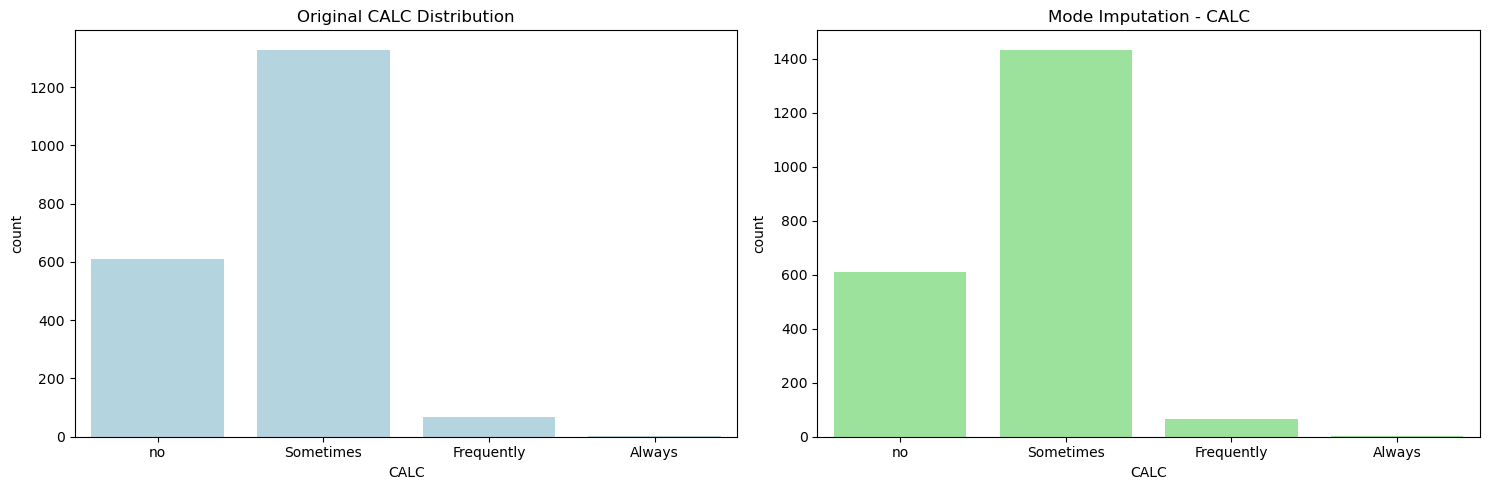

In [104]:
df_mode = df.copy()

mode_value = df_mode['CALC'].mode()[0]

df_mode['CALC'] = df_mode['CALC'].fillna(mode_value)

plt.figure(figsize=(15, 5))

# Plot the original distribution
plt.subplot(1, 2, 1)
sns.countplot(x=df['CALC'], color='lightblue')
plt.title("Original CALC Distribution")

# Plot the mode imputed distribution
plt.subplot(1, 2, 2)
sns.countplot(x=df_mode['CALC'], color='lightgreen')
plt.title("Mode Imputation - CALC")

# Show the plots
plt.tight_layout()
plt.show()

Since 'sometimes' is the norm for most people, we will move forward with the mode impuation.

In [105]:
df['CALC']=df['CALC'].fillna(df['CALC'].mode()[0])

# Transportation

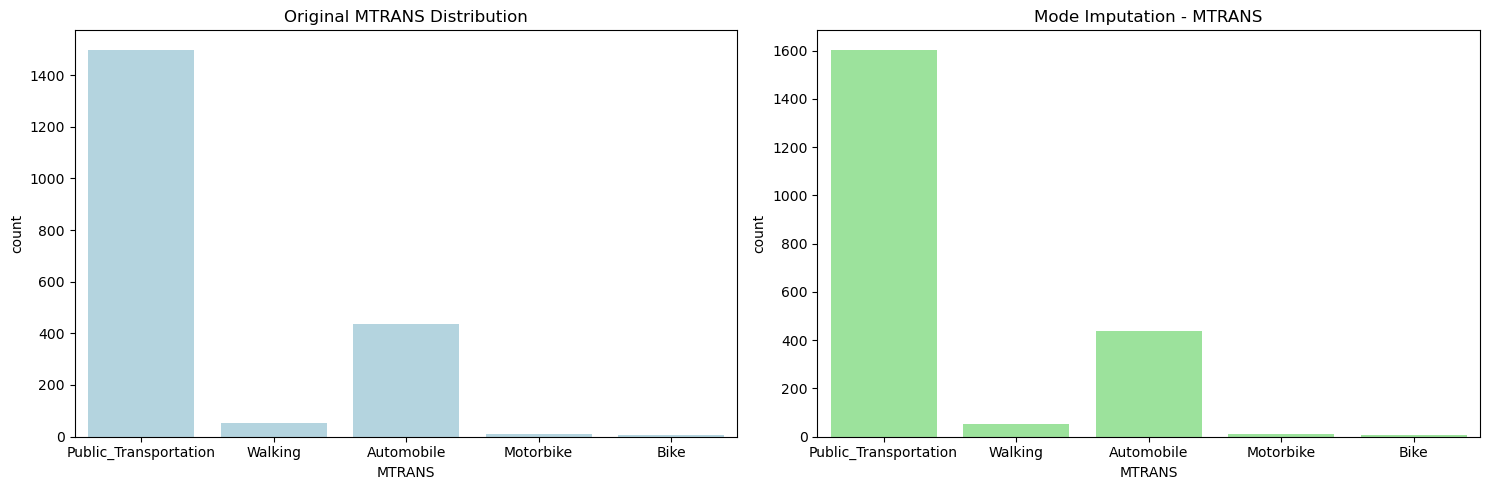

In [106]:
df_mode = df.copy()

mode_value = df_mode['MTRANS'].mode()[0]

df_mode['MTRANS'] = df_mode['MTRANS'].fillna(mode_value)

# Step 4: Create the subplots
plt.figure(figsize=(15, 5))

# Plot the original distribution
plt.subplot(1, 2, 1)
sns.countplot(x=df['MTRANS'], color='lightblue')
plt.title("Original MTRANS Distribution")

# Plot the mode imputed distribution
plt.subplot(1, 2, 2)
sns.countplot(x=df_mode['MTRANS'], color='lightgreen')
plt.title("Mode Imputation - MTRANS")

# Show the plots
plt.tight_layout()
plt.show()


In [107]:
df['MTRANS'] = df['MTRANS'].fillna(df['MTRANS'].mode()[0])

# Obesity Levels (Target feature)

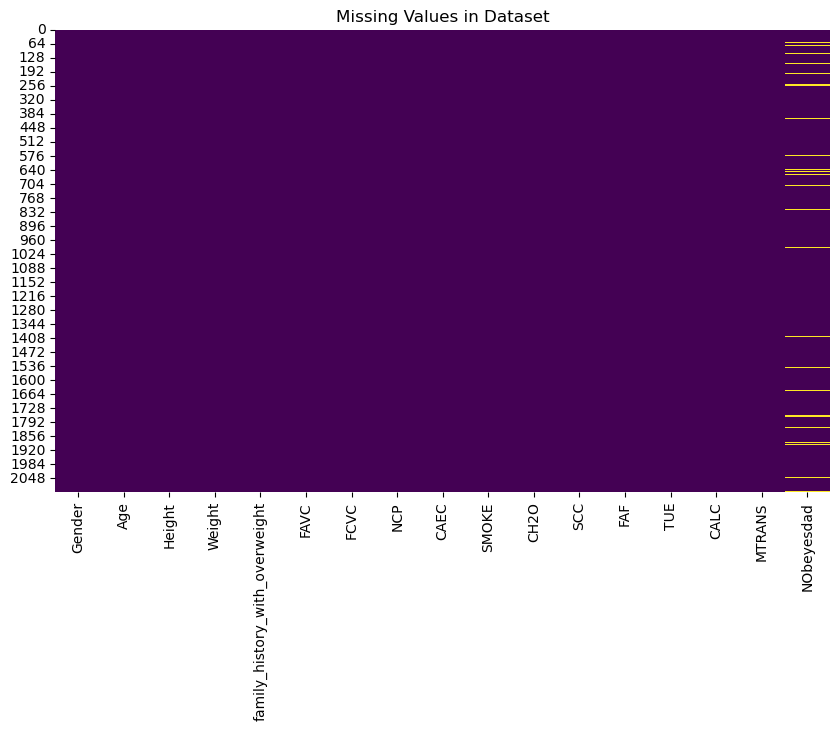

In [108]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values in Dataset")
plt.show()

We will drop rows containing missing values, since they make up only 5% of our data.

In [109]:
df=df.dropna(subset=['NObeyesdad'])

# **Encoding**



```
# This is formatted as code
```

# One-Hot-Encoding

In [110]:
# Map gender to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1, 'no':0})
df['SMOKE'] = df['SMOKE'].map({'yes':1, 'no':0})
df['SCC'] = df['SCC'].map({'yes':1, 'no':0})
df['FAVC'] = df['FAVC'].map({'yes':1, 'no':0})
#Divide the MTRANS Column into many columns and fit with 1 and 0 where it fits
df = pd.get_dummies(df, columns=['MTRANS'], prefix='MTRANS') #this was used to divide the MTRANS Column into sub columns
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Ordinal-Encoding

In [111]:
#CAEC column has many options, each options is assigned a number
df['CAEC'] = df['CAEC'].map({
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
})

#CALC Column
df['CALC'] = df['CALC'].map({
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
})
print(df.dtypes)


Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
NObeyesdad                         object
MTRANS_Automobile                   int32
MTRANS_Bike                         int32
MTRANS_Motorbike                    int32
MTRANS_Public_Transportation        int32
MTRANS_Walking                      int32
dtype: object


**Target Feature**

In [112]:
df['NObeyesdad']=df['NObeyesdad'].map({
    'Normal_Weight': 'Normal Weight',
    'Overweight_Level_I': 'Overweight Level I',
    'Overweight_Level_II': 'Overweight Level II',
    'Obesity_Type_I': 'Obesity Type I',
    'Obesity_Type_II': 'Obesity Type II',
    'Obesity_Type_III': 'Obesity Type III',
    'Insufficient_Weight': 'Insufficient Weight'
})

In [113]:
print(df['NObeyesdad'].unique())

['Normal Weight' 'Overweight Level I' 'Overweight Level II'
 'Obesity Type I' 'Insufficient Weight' 'Obesity Type II'
 'Obesity Type III']


# **Scaling**

In [114]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

df_minmax_scaled = df.copy()

minmax_scaler = MinMaxScaler()
df_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(df[numerical_columns])

df_minmax_scaled[numerical_columns].head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.148936,0.320755,0.186567,0.500,0.666667,0.5,0.000000,0.5
1,0.148936,0.132075,0.126866,1.000,0.666667,1.0,1.000000,0.0
2,0.191489,0.660377,0.283582,0.500,0.666667,0.5,0.666667,0.5
3,0.276596,0.660377,0.358209,1.000,0.666667,0.5,0.666667,0.0
4,0.170213,0.622642,0.379104,0.695,0.000000,0.5,0.000000,0.0


In [115]:
df=df_minmax_scaled

# **Feature Engineering**

In [116]:
#Body Mass Index
df['BMI']=df['Weight']/((df['Height'])**2)

#Meal Regularity Score
df['meal_regularity_score'] = df['FCVC'] * df['NCP'] - df['CAEC']

#Hydration/Activity Ratio
df['hydration_activity_ratio'] = df['CH2O'] / (df['FAF'] + 0.1)

#Tech-to-Activity Ratio
df['tech_activity_ratio'] = df['TUE'] / (df['FAF'] + 0.1)

df['genetic_diet_risk'] = df['family_history_with_overweight'] * df['FAVC']


print(df[['BMI', 'meal_regularity_score', 'hydration_activity_ratio',
          'tech_activity_ratio', 'genetic_diet_risk']].describe())


               BMI  meal_regularity_score  hydration_activity_ratio  \
count  2006.000000            2006.000000               2006.000000   
mean           inf              -0.723187                  2.115152   
std            NaN               0.499969                  2.365331   
min       0.000000              -3.000000                  0.000000   
25%       0.906804              -0.908933                  0.652174   
50%       1.449029              -0.666667                  1.153846   
75%       2.399680              -0.333333                  2.550000   
max            inf               0.666667                 10.000000   

       tech_activity_ratio  genetic_diet_risk  
count          2006.000000        2006.000000  
mean              1.350396           0.763709  
std               2.061269           0.424909  
min               0.000000           0.000000  
25%               0.000000           1.000000  
50%               0.652174           1.000000  
75%               1.5748

In [117]:
# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
df[['meal_regularity_score', 'hydration_activity_ratio', 'tech_activity_ratio']] = scaler.fit_transform(
    df[['meal_regularity_score', 'hydration_activity_ratio', 'tech_activity_ratio']]
)

# Check the updated data
print(df[['meal_regularity_score', 'hydration_activity_ratio', 'tech_activity_ratio']].describe())


       meal_regularity_score  hydration_activity_ratio  tech_activity_ratio
count            2006.000000               2006.000000          2006.000000
mean                0.620949                  0.211515             0.135040
std                 0.136355                  0.236533             0.206127
min                 0.000000                  0.000000             0.000000
25%                 0.570291                  0.065217             0.000000
50%                 0.636364                  0.115385             0.065217
75%                 0.727273                  0.255000             0.157484
max                 1.000000                  1.000000             1.000000


# **Training**

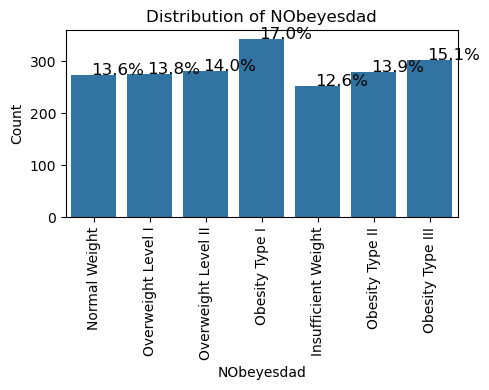

In [118]:
# Target variable
target_column = 'NObeyesdad'
target = df[target_column]

# Plot
plt.figure(figsize=(5, 4))
ax = sns.countplot(x=target, data=df)
plt.title(f'Distribution of {target_column}')
plt.xlabel(f'{target_column}')
plt.ylabel('Count')

plt.xticks(rotation=90, ha='center')

# Add percentage labels
total = len(target)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

plt.tight_layout()
plt.show()

In [119]:
df['NObeyesdad']=df['NObeyesdad'].map({
    'Insufficient Weight' : 0,
    'Normal Weight' : 1,
    'Overweight Level I' : 2,
    'Overweight Level II' : 3,
    'Obesity Type I' : 4,
    'Obesity Type II' : 5,
    'Obesity Type III' : 6,
})
print(df['NObeyesdad'].unique())

[1 2 3 4 0 5 6]


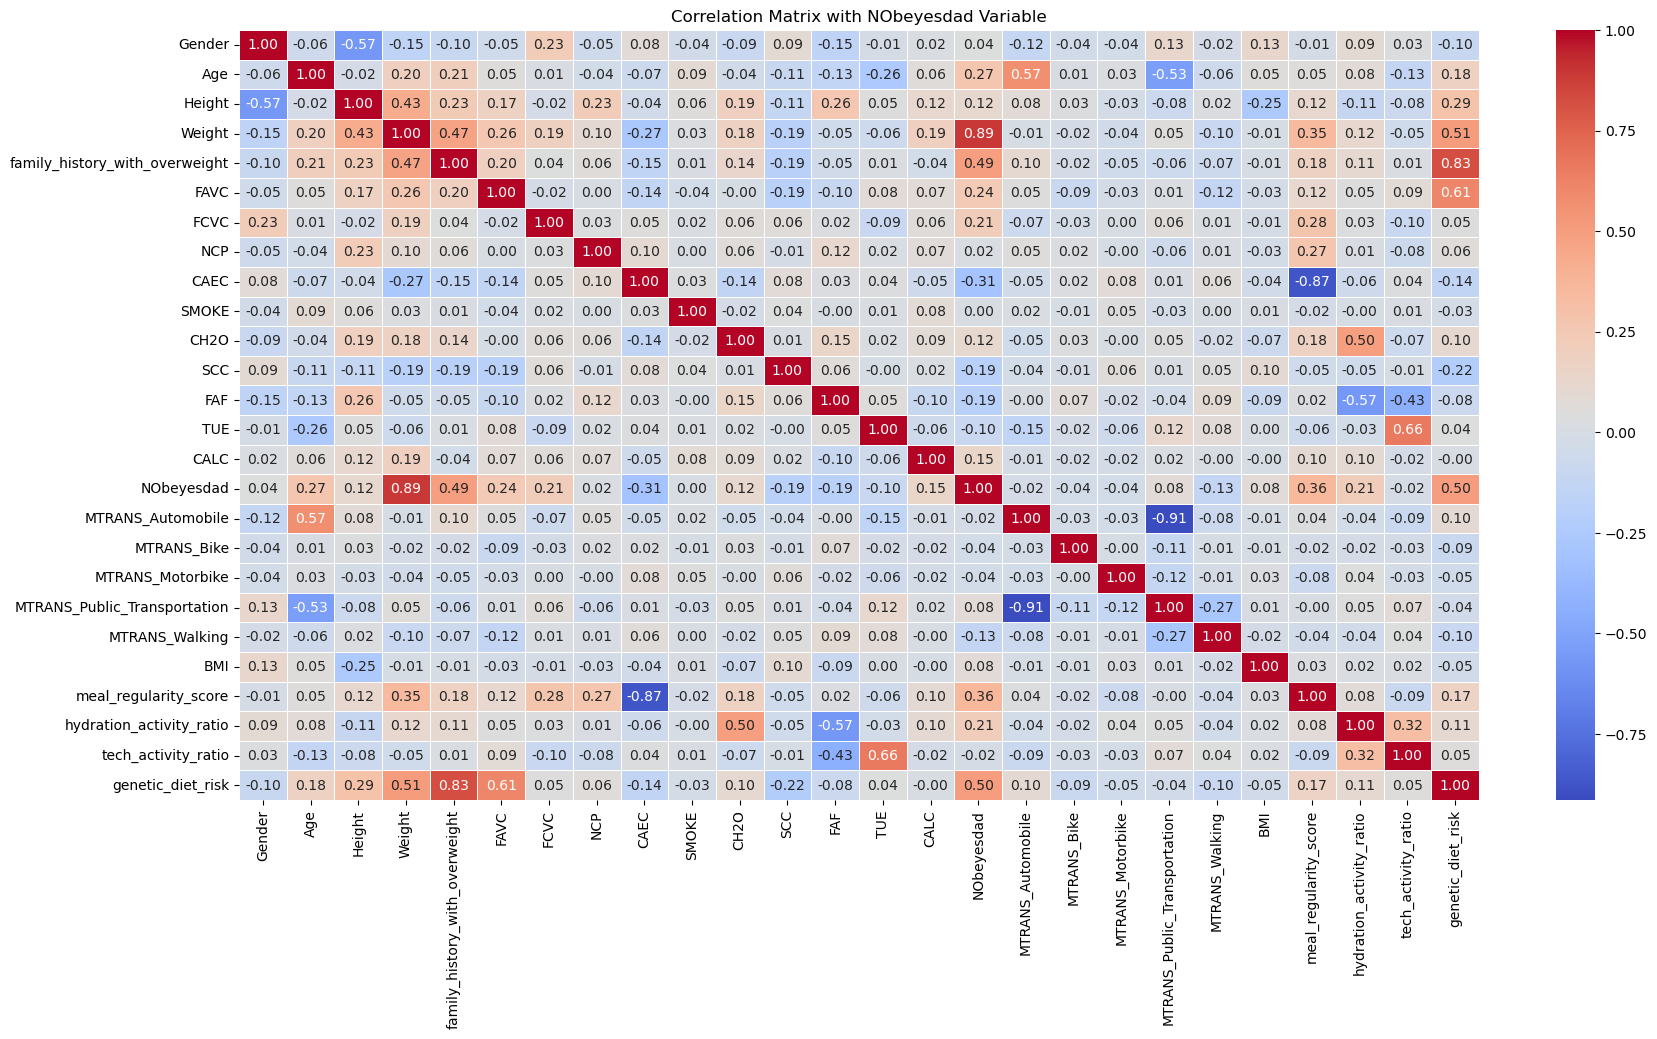


Correlation with Target Variable (NObeyesdad):
Weight                            0.888627
genetic_diet_risk                 0.499095
family_history_with_overweight    0.491989
meal_regularity_score             0.358979
Age                               0.270928
FAVC                              0.238467
hydration_activity_ratio          0.208921
FCVC                              0.208547
CALC                              0.146583
CH2O                              0.117361
Height                            0.116805
MTRANS_Public_Transportation      0.076735
BMI                               0.075658
Gender                            0.035587
NCP                               0.018870
SMOKE                             0.003116
tech_activity_ratio              -0.015123
MTRANS_Automobile                -0.021423
MTRANS_Bike                      -0.037698
MTRANS_Motorbike                 -0.037904
TUE                              -0.096725
MTRANS_Walking                   -0.128710
SCC   

In [120]:
# Calculate correlation matrix using only numeric columns
correlation_matrix = df.select_dtypes(include='number').corr()

# Set your target column
target = 'NObeyesdad'

# Filter for correlations with the target
target_correlations = correlation_matrix[target].drop(target)

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix with ' + target + ' Variable')
plt.show()

# Show sorted correlations with the target variable
print("\nCorrelation with Target Variable (" + target + "):")
print(target_correlations.sort_values(ascending=False))

Selected features: ['Weight', 'family_history_with_overweight', 'CAEC', 'meal_regularity_score', 'genetic_diet_risk']


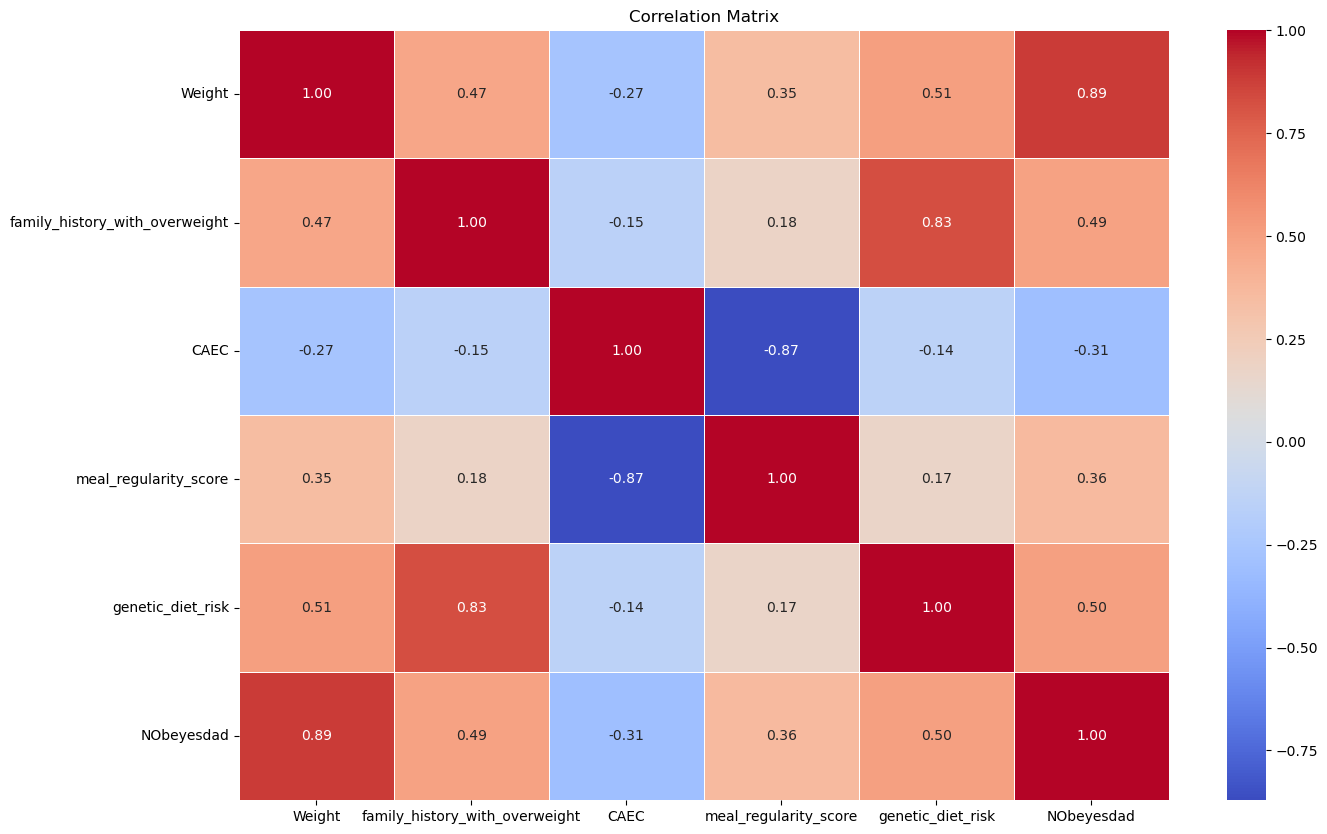

In [121]:
#select highly correlated variables

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Filter for correlations with the target variable
target_correlations = correlation_matrix[target].drop(target)  # Exclude self-correlation

# Select features with correlation >= threshold
selected_features = target_correlations[target_correlations.abs() > 0.3].index.tolist()

# Display the selected features
print("Selected features:", selected_features)

# Create a new DataFrame with only the selected features
filtered_df = df[selected_features + [target]]  # Include target variable if needed

correlation_matrix = filtered_df.corr()
# Plot the heatmap
plt.figure(figsize=(15, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [122]:
df=filtered_df
df.head()

,Weight,family_history_with_overweight,CAEC,meal_regularity_score,genetic_diet_risk,NObeyesdad
0,0.186567,1,1,0.636364,0,1
1,0.126866,1,1,0.727273,0,1
2,0.283582,1,1,0.636364,1,1
3,0.358209,0,1,0.727273,0,2
4,0.379104,0,1,0.545455,0,3


In [123]:
# Feature-target split
X = df.drop(target, axis=1)
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Target variable distribution in training set:")
print(y_train.value_counts())

print("\nTarget variable distribution in testing set:")
print(y_test.value_counts())
selected_features = ['CAEC', 'family_history_with_overweight', 'genetic_diet_risk', 'meal_regularity_score']
X = df[selected_features]
y = df['NObeyesdad']  # target variable

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

model = RandomForestClassifier()
model.fit(X_scaled, y)


Target variable distribution in training set:
NObeyesdad
4    276
6    244
3    226
1    221
2    220
5    220
0    197
Name: count, dtype: int64

Target variable distribution in testing set:
NObeyesdad
4    66
6    59
5    59
0    56
2    56
3    54
1    52
Name: count, dtype: int64


RandomForestClassifier()

In [124]:
# Load classifiers
logReg = ("Logistic Regression", LogisticRegression(multi_class='multinomial', solver='lbfgs'))
KNN = ("K-Nearest Neighbors", KNeighborsClassifier())
SVM = ("Support Vector Machine", SVC())
DecisionTree = ("Decision Tree Classifier", DecisionTreeClassifier())
RandForest = ("Random Forest", RandomForestClassifier())
NaiveBayes = ("Naive Bayes", GaussianNB())

In [125]:
# Evaluate classifiers one by one
metrics_data = []
class_names = y_train.unique()

# Evaluate the models
def run_evaluate_model(classifier):
    name, model = classifier[0], classifier[1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Display confusion matrix
    plot_confusion_matrix(y_test, y_pred, name)


# Function to plot confusion matrix for a model
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)  # change color map if you want
    plt.title("Multiclass Confusion Matrix for "+model_name)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Logistic regression**

c:\Users\jason\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\jason\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Accuracy: 0.572139303482587
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71        56
           1       0.56      0.54      0.55        52
           2       0.56      0.34      0.42        56
           3       0.69      0.20      0.31        54
           4       0.40      0.74      0.52        66
           5       0.71      0.51      0.59        59
           6       0.65      0.90      0.76        59

    accuracy                           0.57       402
   macro avg       0.61      0.56      0.55       402
weighted avg       0.61      0.57      0.55       402



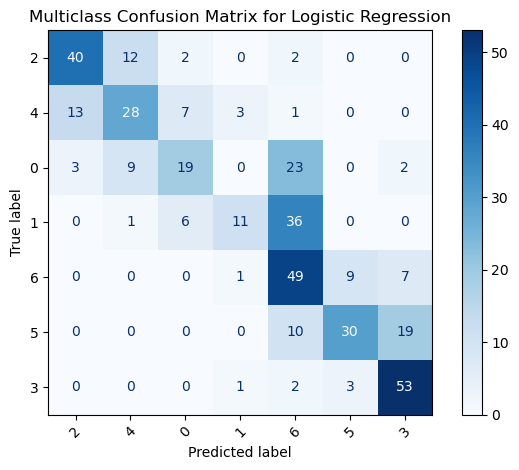

In [126]:
# Evaluate Logistic Regression
run_evaluate_model(logReg)


**KNN**

--- K-Nearest Neighbors ---
Accuracy: 0.7189054726368159
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        56
           1       0.55      0.73      0.63        52
           2       0.64      0.54      0.58        56
           3       0.73      0.56      0.63        54
           4       0.59      0.67      0.62        66
           5       0.91      0.81      0.86        59
           6       0.85      0.90      0.88        59

    accuracy                           0.72       402
   macro avg       0.73      0.72      0.72       402
weighted avg       0.73      0.72      0.72       402



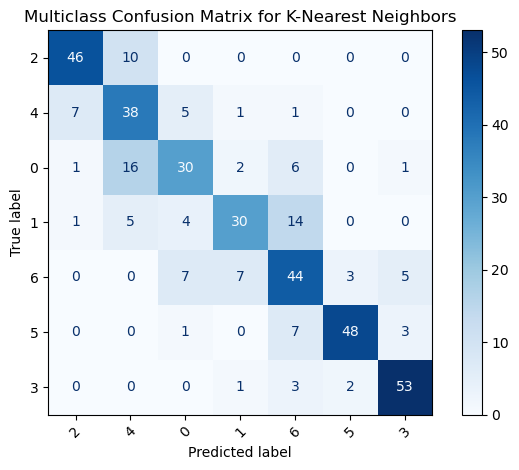

In [127]:
run_evaluate_model(KNN)

**Support Vector Machine**

--- Support Vector Machine ---
Accuracy: 0.582089552238806
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80        56
           1       0.52      0.52      0.52        52
           2       0.52      0.39      0.45        56
           3       0.65      0.20      0.31        54
           4       0.39      0.61      0.47        66
           5       0.78      0.53      0.63        59
           6       0.67      0.90      0.77        59

    accuracy                           0.58       402
   macro avg       0.61      0.58      0.56       402
weighted avg       0.60      0.58      0.57       402



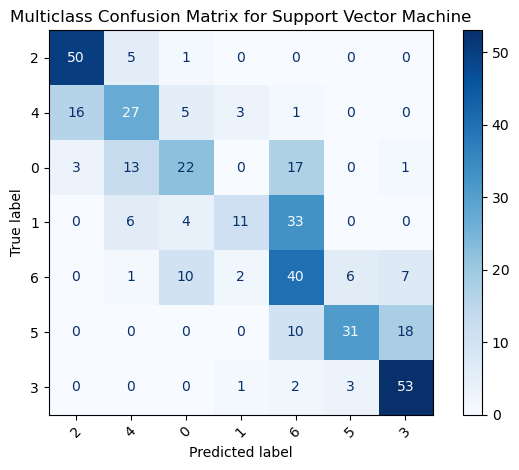

In [128]:
run_evaluate_model(SVM)

**Decision Tree**

--- Decision Tree Classifier ---
Accuracy: 0.7139303482587065
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85        56
           1       0.56      0.71      0.63        52
           2       0.67      0.50      0.57        56
           3       0.52      0.46      0.49        54
           4       0.58      0.65      0.61        66
           5       0.94      0.83      0.88        59
           6       0.89      0.98      0.94        59

    accuracy                           0.71       402
   macro avg       0.72      0.71      0.71       402
weighted avg       0.72      0.71      0.71       402



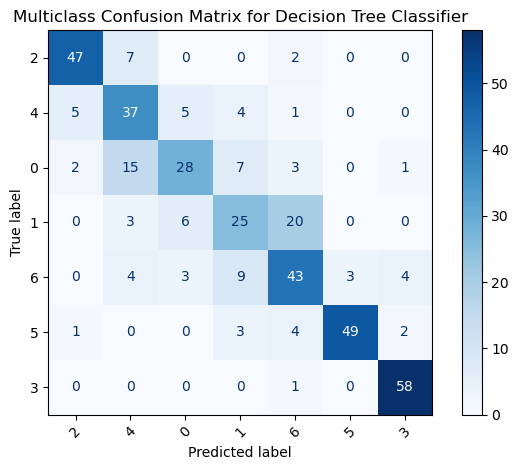

In [129]:
run_evaluate_model(DecisionTree)

**Random Forest**

--- Random Forest ---
Accuracy: 0.7786069651741293
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        56
           1       0.72      0.79      0.75        52
           2       0.74      0.66      0.70        56
           3       0.71      0.54      0.61        54
           4       0.61      0.71      0.66        66
           5       0.96      0.86      0.91        59
           6       0.91      0.98      0.94        59

    accuracy                           0.78       402
   macro avg       0.78      0.78      0.78       402
weighted avg       0.78      0.78      0.78       402



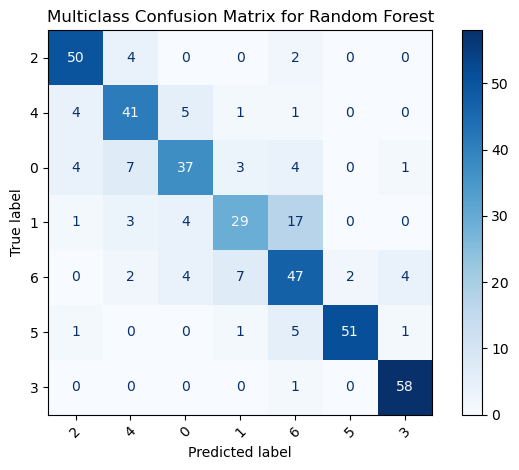

In [130]:
run_evaluate_model(RandForest)

**Naive Bayes**

--- Naive Bayes ---
Accuracy: 0.373134328358209
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.71      0.70        56
           1       0.49      0.35      0.40        52
           2       0.23      0.09      0.13        56
           3       0.71      0.09      0.16        54
           4       0.38      0.27      0.32        66
           5       0.64      0.12      0.20        59
           6       0.26      0.97      0.41        59

    accuracy                           0.37       402
   macro avg       0.48      0.37      0.33       402
weighted avg       0.48      0.37      0.33       402



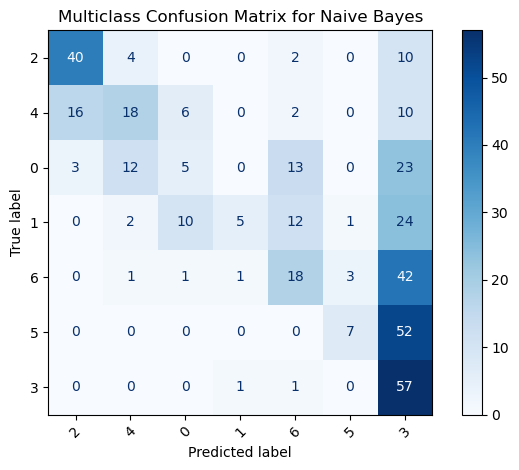

In [131]:
run_evaluate_model(NaiveBayes)

The best algorithm was the Random Forest, with an accuracy of 76%.
We will try to optimize it by reducing the classes to just 4, merging the overweight and obesity values together respectively.

# **Merging**

In [132]:
mapping = {
    0: 0,  # insufficient weight
    1: 1,  # normal weight
    2: 2,  # overweight
    3: 2,  # overweight
    4: 4,  # obesity
    5: 4,  # obesity
    6: 4   # obesity
}

df = filtered_df
df['NObeyesdad'] = df['NObeyesdad'].map(mapping)
print(df['NObeyesdad'].unique())

[1 2 4 0]


C:\Users\jason\AppData\Local\Temp\ipykernel_4680\2945903493.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NObeyesdad'] = df['NObeyesdad'].map(mapping)


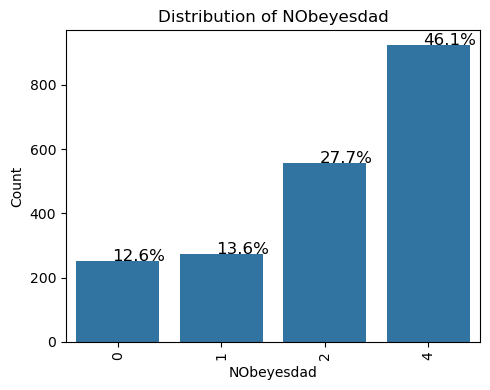

In [133]:
# Target variable
target_column = 'NObeyesdad'
target = df[target_column]

# Plot
plt.figure(figsize=(5, 4))
ax = sns.countplot(x=target, data=df)
plt.title(f'Distribution of {target_column}')
plt.xlabel(f'{target_column}')
plt.ylabel('Count')

plt.xticks(rotation=90, ha='center')

# Add percentage labels
total = len(target)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

plt.tight_layout()
plt.show()

In [134]:
target_column = 'NObeyesdad'  
target = df[target_column]

In [135]:
X = df.drop(columns=[target_column])
y = target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [136]:
# Evaluate classifiers one by one
metrics_data = []
class_names = y_train.unique()

# Evaluate the models
def run_evaluate_model(classifier):
    name, model = classifier[0], classifier[1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Display confusion matrix
    plot_confusion_matrix(y_test, y_pred, name)


# Function to plot confusion matrix for a model
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)  # change color map if you want
    plt.title("Multiclass Confusion Matrix for "+model_name)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

c:\Users\jason\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


--- Logistic Regression ---
Accuracy: 0.6990049751243781
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.62      0.68        56
           1       0.56      0.44      0.49        52
           2       0.55      0.60      0.57       110
           4       0.81      0.85      0.83       184

    accuracy                           0.70       402
   macro avg       0.67      0.63      0.64       402
weighted avg       0.70      0.70      0.70       402



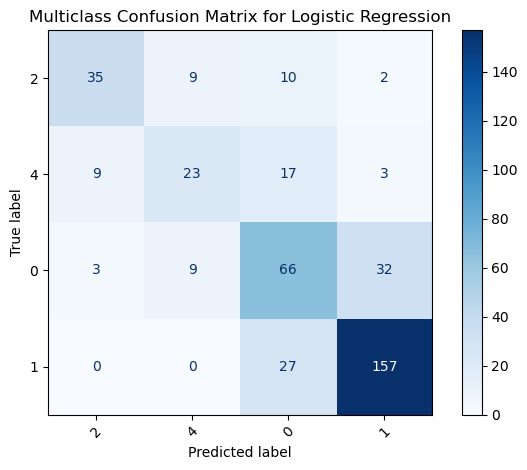

In [137]:
run_evaluate_model(logReg)

--- K-Nearest Neighbors ---
Accuracy: 0.8109452736318408
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84        56
           1       0.58      0.73      0.65        52
           2       0.77      0.67      0.72       110
           4       0.89      0.91      0.90       184

    accuracy                           0.81       402
   macro avg       0.78      0.78      0.78       402
weighted avg       0.82      0.81      0.81       402



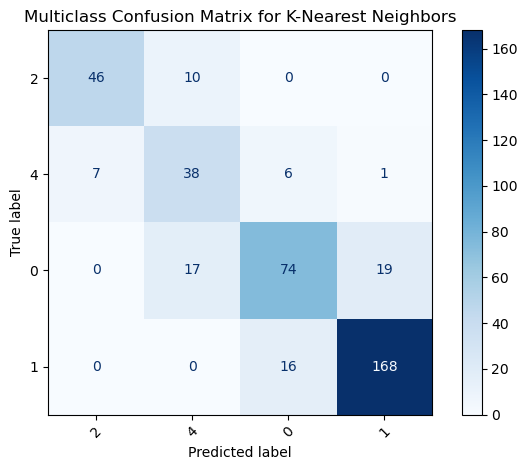

In [138]:
run_evaluate_model(KNN)

--- Support Vector Machine ---
Accuracy: 0.7388059701492538
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80        56
           1       0.57      0.48      0.52        52
           2       0.60      0.71      0.65       110
           4       0.90      0.78      0.84       184

    accuracy                           0.74       402
   macro avg       0.70      0.72      0.70       402
weighted avg       0.75      0.74      0.74       402



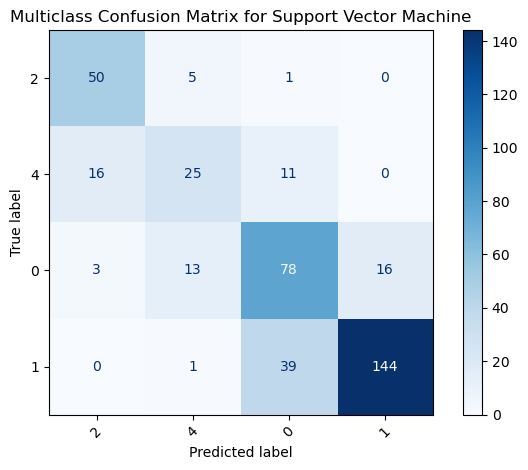

In [139]:
run_evaluate_model(SVM)

--- Decision Tree Classifier ---
Accuracy: 0.8034825870646766
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85        56
           1       0.60      0.73      0.66        52
           2       0.77      0.66      0.71       110
           4       0.87      0.90      0.88       184

    accuracy                           0.80       402
   macro avg       0.78      0.78      0.78       402
weighted avg       0.81      0.80      0.80       402



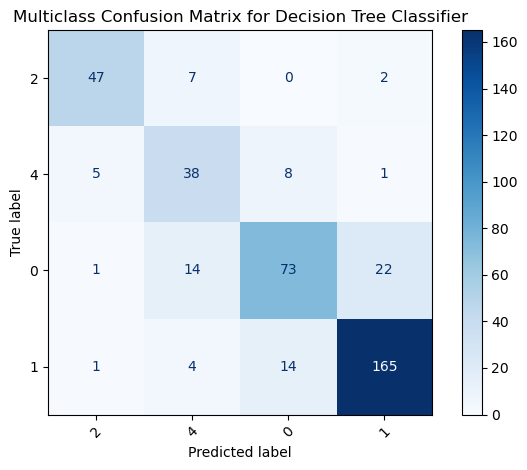

In [140]:
run_evaluate_model(DecisionTree)

--- Random Forest ---
Accuracy: 0.8383084577114428
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        56
           1       0.71      0.77      0.74        52
           2       0.80      0.71      0.75       110
           4       0.88      0.92      0.90       184

    accuracy                           0.84       402
   macro avg       0.82      0.82      0.82       402
weighted avg       0.84      0.84      0.84       402



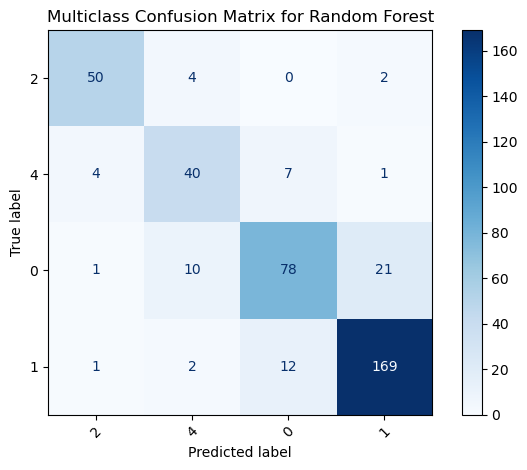

In [141]:
run_evaluate_model(RandForest)

--- Naive Bayes ---
Accuracy: 0.6417910447761194
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69        56
           1       0.49      0.40      0.44        52
           2       0.62      0.16      0.26       110
           4       0.66      0.98      0.79       184

    accuracy                           0.64       402
   macro avg       0.61      0.56      0.54       402
weighted avg       0.63      0.64      0.58       402



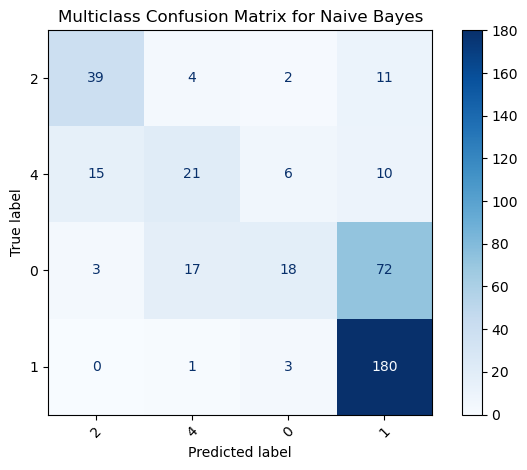

In [142]:
run_evaluate_model(NaiveBayes)

We will move forward with the Random Forest model.

In [143]:
#import joblib

#joblib.dump(RandForest[1], 'random_forest_model.pkl')
#joblib.dump(selected_features, 'features.pkl')